In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

In [2]:
# Get stock data from Yahoo Finance
def get_stock_data(symbol):
    stock_data = yf.download(symbol)
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(f'{symbol} Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
 
    return stock_data[['Open', 'High', 'Low', 'Close', 'Volume']], stock_data.index


In [3]:
# Create sequences for training
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

In [4]:
def plot_predictions_with_dates(dates, actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, actual, label='Actual')  
    plt.plot(dates, predicted, label='Predicted') 
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [5]:
# Define stock symbols and sequence length
symbols = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMD']
sequence_length = 10

In [6]:
# Evaluate model performance
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")


C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


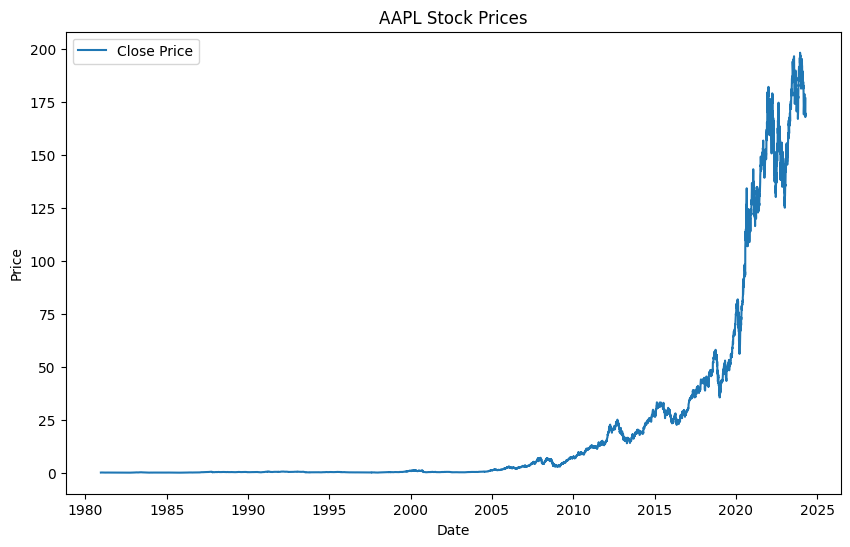



Epoch 1/10

246/246 - 5s - loss: 1.9282e-05 - val_loss: 2.2244e-05 - 5s/epoch - 19ms/step
Epoch 2/10
246/246 - 1s - loss: 4.1430e-06 - val_loss: 2.4775e-05 - 1s/epoch - 5ms/step
Epoch 3/10
246/246 - 1s - loss: 4.9902e-06 - val_loss: 3.4659e-05 - 1s/epoch - 5ms/step
Epoch 4/10
246/246 - 1s - loss: 3.7109e-06 - val_loss: 1.2695e-05 - 1s/epoch - 5ms/step
Epoch 5/10
246/246 - 1s - loss: 3.6846e-06 - val_loss: 1.1878e-05 - 1s/epoch - 5ms/step
Epoch 6/10
246/246 - 1s - loss: 3.0590e-06 - val_loss: 1.1820e-05 - 1s/epoch - 5ms/step
Epoch 7/10
246/246 - 1s - loss: 3.8859e-06 - val_loss: 1.9900e-05 - 1s/epoch - 5ms/step
Epoch 8/10
246/246 - 1s - loss: 3.5189e-06 - val_loss: 5.1578e-05 - 1s/epoch - 5ms/step
Epoch 9/10
Restoring model weights from the end of the best epoch: 6.
246/246 - 1s - loss: 3.2399e-06 - val_loss: 6.6229e-05 - 1s/epoch - 5ms/step
Epoch 9: early stopping
69/69 [==============================] - 1s 2ms/step


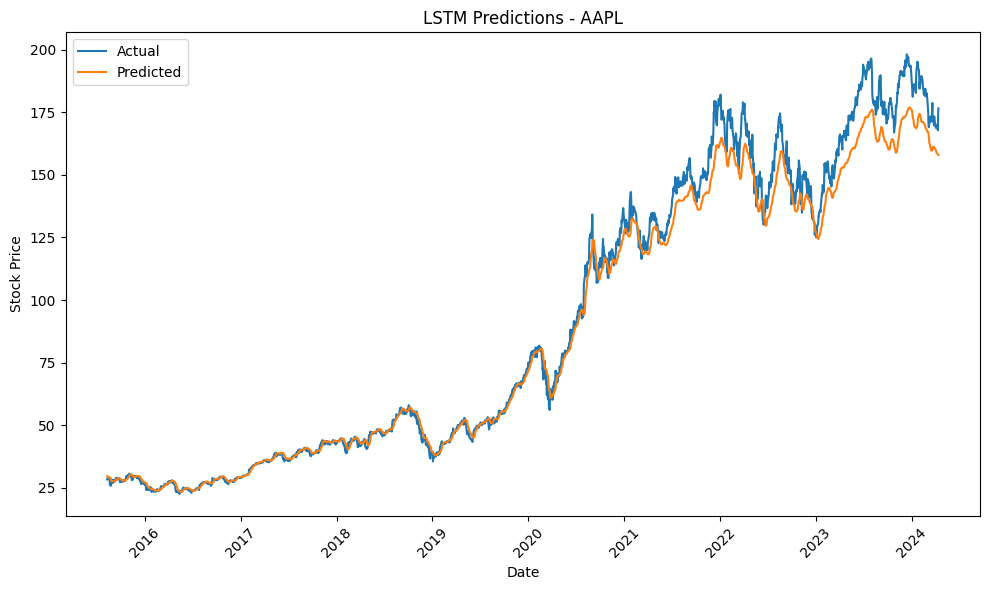

C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Evaluating LSTM Performance for AAPL
Mean Squared Error (MSE): 55.08337784518044
Root Mean Squared Error (RMSE): 7.421817691454058
Mean Absolute Error (MAE): 4.702746711517768
R^2 Score: 0.9833886163079786


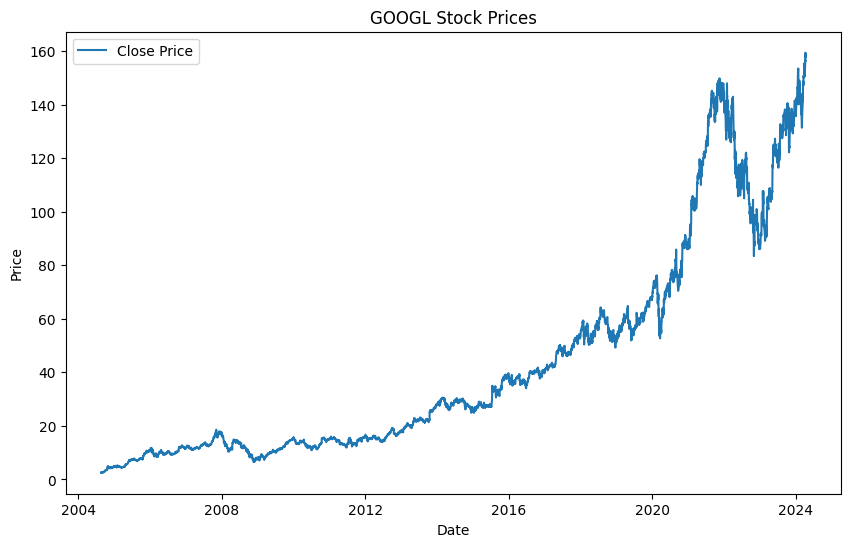

Epoch 1/10
112/112 - 4s - loss: 0.0012 - val_loss: 2.1108e-04 - 4s/epoch - 31ms/step
Epoch 2/10
112/112 - 1s - loss: 2.5376e-04 - val_loss: 6.2787e-04 - 536ms/epoch - 5ms/step
Epoch 3/10
112/112 - 1s - loss: 2.1155e-04 - val_loss: 2.7602e-04 - 538ms/epoch - 5ms/step
Epoch 4/10
112/112 - 1s - loss: 1.9165e-04 - val_loss: 1.8300e-04 - 540ms/epoch - 5ms/step
Epoch 5/10
112/112 - 1s - loss: 1.7220e-04 - val_loss: 2.0379e-04 - 537ms/epoch - 5ms/step
Epoch 6/10
112/112 - 1s - loss: 1.8242e-04 - val_loss: 1.7413e-04 - 534ms/epoch - 5ms/step
Epoch 7/10
112/112 - 1s - loss: 1.5102e-04 - val_loss: 1.7663e-04 - 554ms/epoch - 5ms/step
Epoch 8/10
112/112 - 1s - loss: 1.4373e-04 - val_loss: 1.6931e-04 - 574ms/epoch - 5ms/step
Epoch 9/10
112/112 - 1s - loss: 1.2992e-04 - val_loss: 1.6849e-04 - 574ms/epoch - 5ms/step
Epoch 10/10
112/112 - 1s - loss: 1.2804e-04 - val_loss: 1.8330e-04 - 584ms/epoch - 5ms/step
31/31 [==============================] - 1s 2ms/step


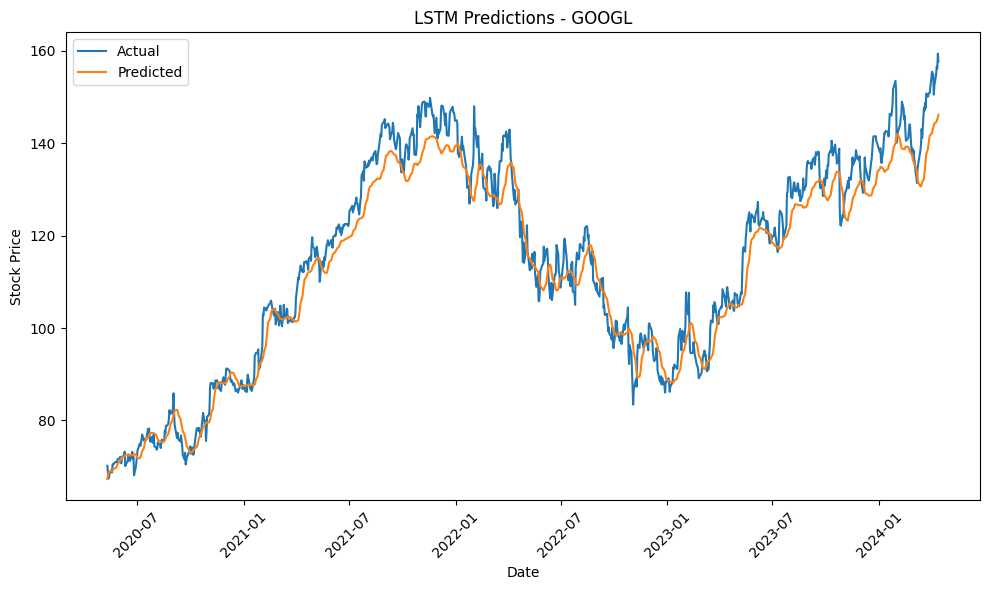

Evaluating LSTM Performance for GOOGL
Mean Squared Error (MSE): 27.441727224210357
Root Mean Squared Error (RMSE): 5.2384852032062055
Mean Absolute Error (MAE): 4.15694625174951
R^2 Score: 0.9493208379411672


C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


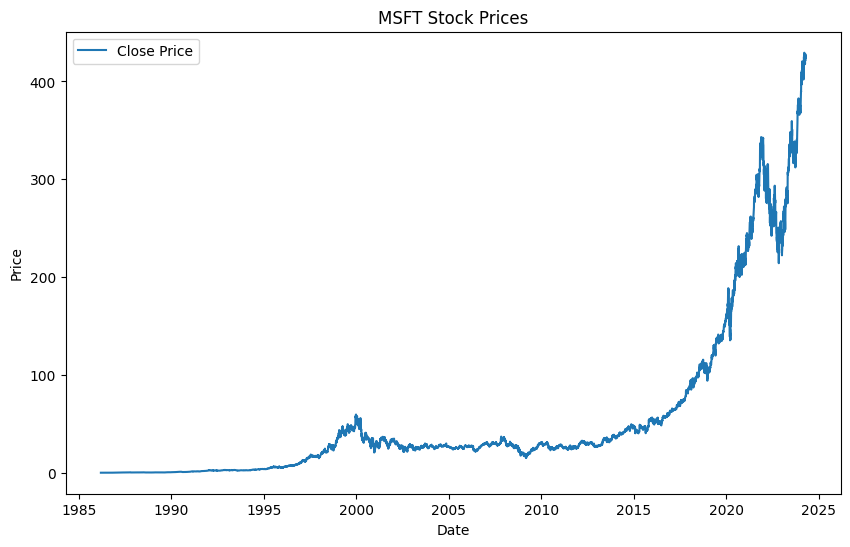

Epoch 1/10
216/216 - 4s - loss: 7.0805e-05 - val_loss: 1.5269e-05 - 4s/epoch - 19ms/step
Epoch 2/10
216/216 - 1s - loss: 2.0784e-05 - val_loss: 8.9907e-06 - 1s/epoch - 5ms/step
Epoch 3/10
216/216 - 1s - loss: 1.7278e-05 - val_loss: 2.0976e-05 - 1s/epoch - 5ms/step
Epoch 4/10
216/216 - 1s - loss: 1.5635e-05 - val_loss: 3.1865e-05 - 1s/epoch - 5ms/step
Epoch 5/10
Restoring model weights from the end of the best epoch: 2.
216/216 - 1s - loss: 1.4434e-05 - val_loss: 1.3526e-05 - 1s/epoch - 5ms/step
Epoch 5: early stopping
60/60 [==============================] - 1s 2ms/step


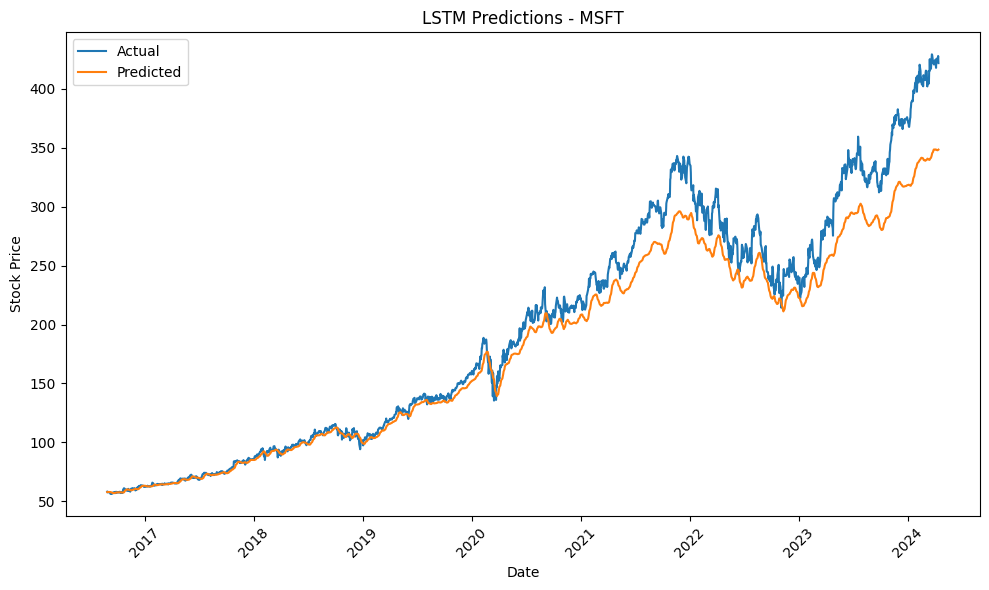

C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Evaluating LSTM Performance for MSFT
Mean Squared Error (MSE): 623.380819999392
Root Mean Squared Error (RMSE): 24.967595398824294
Mean Absolute Error (MAE): 16.785631426432335
R^2 Score: 0.9389734489880692


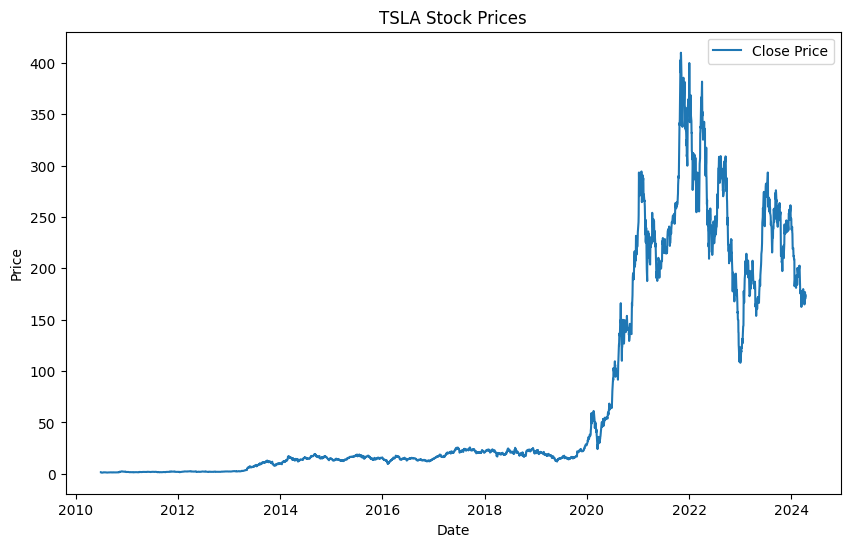

Epoch 1/10
78/78 - 3s - loss: 1.6434e-04 - val_loss: 0.0034 - 3s/epoch - 44ms/step
Epoch 2/10
78/78 - 0s - loss: 3.4117e-05 - val_loss: 0.0034 - 385ms/epoch - 5ms/step
Epoch 3/10
78/78 - 0s - loss: 3.4100e-05 - val_loss: 0.0026 - 389ms/epoch - 5ms/step
Epoch 4/10
78/78 - 0s - loss: 2.7535e-05 - val_loss: 0.0025 - 410ms/epoch - 5ms/step
Epoch 5/10
78/78 - 0s - loss: 2.6276e-05 - val_loss: 0.0034 - 451ms/epoch - 6ms/step
Epoch 6/10
78/78 - 0s - loss: 2.1357e-05 - val_loss: 0.0026 - 415ms/epoch - 5ms/step
Epoch 7/10
Restoring model weights from the end of the best epoch: 4.
78/78 - 0s - loss: 2.2316e-05 - val_loss: 0.0045 - 430ms/epoch - 6ms/step
Epoch 7: early stopping
22/22 [==============================] - 1s 2ms/step


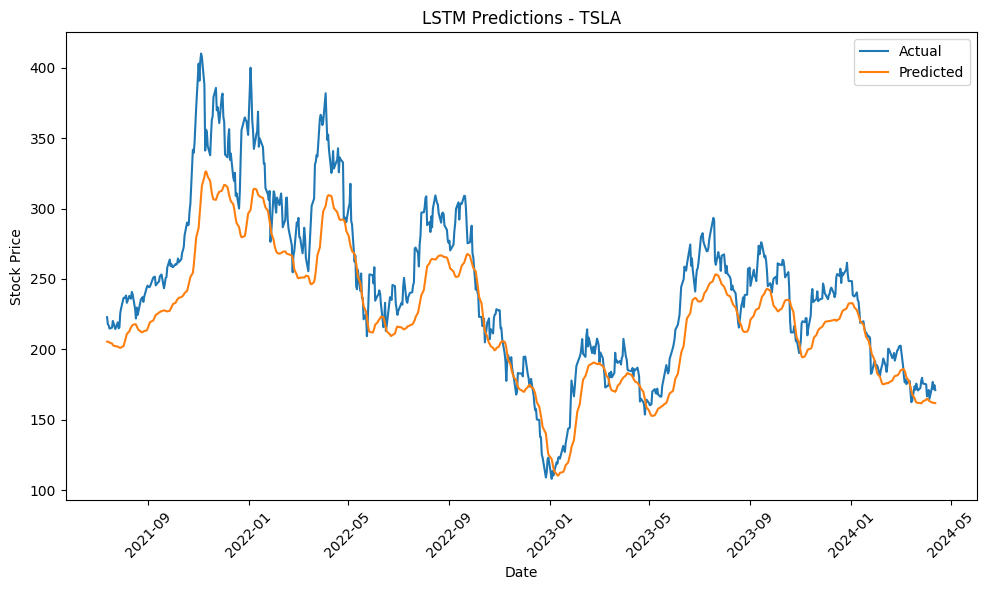

Evaluating LSTM Performance for TSLA
Mean Squared Error (MSE): 920.2082260984237
Root Mean Squared Error (RMSE): 30.3349340875899
Mean Absolute Error (MAE): 23.928928424785664
R^2 Score: 0.7372611437476457


C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


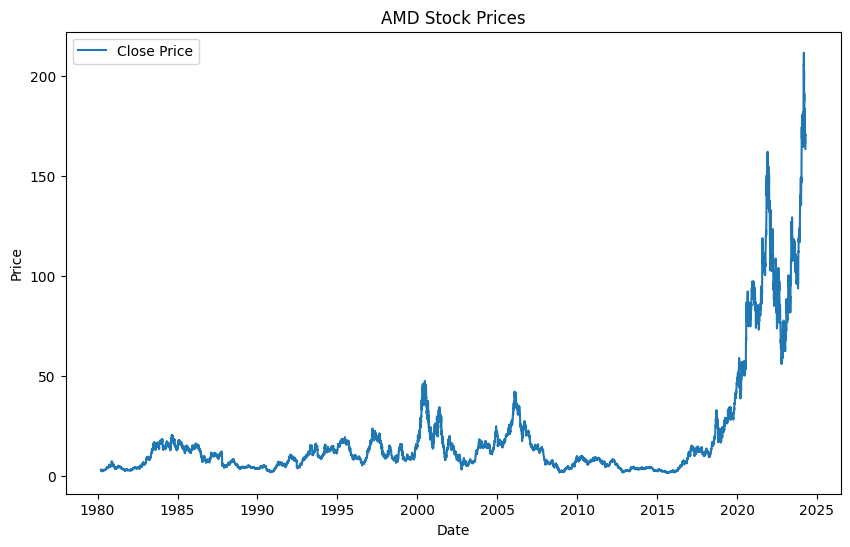

Epoch 1/10
250/250 - 4s - loss: 9.1937e-05 - val_loss: 1.5653e-06 - 4s/epoch - 17ms/step
Epoch 2/10
250/250 - 1s - loss: 4.4423e-05 - val_loss: 3.0096e-06 - 1s/epoch - 5ms/step
Epoch 3/10
250/250 - 1s - loss: 3.8178e-05 - val_loss: 2.5122e-06 - 1s/epoch - 5ms/step
Epoch 4/10
250/250 - 1s - loss: 3.3285e-05 - val_loss: 1.2273e-06 - 1s/epoch - 5ms/step
Epoch 5/10
250/250 - 1s - loss: 3.1199e-05 - val_loss: 9.7291e-07 - 1s/epoch - 5ms/step
Epoch 6/10
250/250 - 1s - loss: 2.8250e-05 - val_loss: 5.0526e-06 - 1s/epoch - 5ms/step
Epoch 7/10
250/250 - 1s - loss: 2.5717e-05 - val_loss: 3.1443e-06 - 1s/epoch - 5ms/step
Epoch 8/10
Restoring model weights from the end of the best epoch: 5.
250/250 - 1s - loss: 2.6336e-05 - val_loss: 1.1316e-06 - 1s/epoch - 5ms/step
Epoch 8: early stopping
70/70 [==============================] - 1s 2ms/step


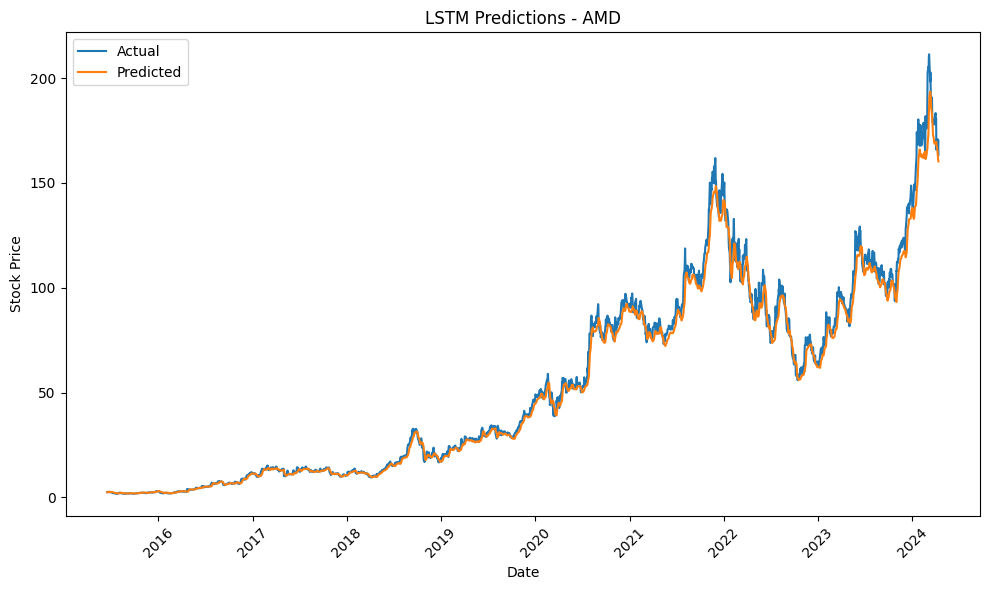

Evaluating LSTM Performance for AMD
Mean Squared Error (MSE): 22.736699223943138
Root Mean Squared Error (RMSE): 4.768301503045203
Mean Absolute Error (MAE): 2.795078849427499
R^2 Score: 0.9896950727397148


In [8]:
for symbol in symbols:
    stock_data, dates = get_stock_data(symbol)
    
    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(stock_data)
    
    # Extract and scale the Close price for y
    close_scaler = MinMaxScaler()
    close_prices_scaled = close_scaler.fit_transform(stock_data[['Close']])
    
    # Create sequences with all features but target the scaled Close prices
    X, y = create_sequences(data_scaled, close_prices_scaled.flatten(), sequence_length)
    
    # Split the data into training and testing sets
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Build the LSTM model with dropout for regularization
    lstm_model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(sequence_length, data_scaled.shape[1])),
        Dropout(0.2),
        LSTM(units=50),
        Dropout(0.2),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

    # Train the LSTM model
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Predict on the test set with the LSTM model
    predictions_scaled_lstm = lstm_model.predict(X_test)
    
    # Correctly inverse transform the predictions
    predictions_lstm = close_scaler.inverse_transform(predictions_scaled_lstm)
    y_test_original = close_scaler.inverse_transform(y_test.reshape(-1, 1))

    prediction_dates = dates[split_index + sequence_length:][:len(predictions_lstm)]

    
    plot_predictions_with_dates(prediction_dates, y_test_original, predictions_lstm, f'LSTM Predictions - {symbol}')
    
    
    # Evaluate LSTM model performance with additional metrics
    print(f'Evaluating LSTM Performance for {symbol}')
    evaluate_model_performance(y_test_original, predictions_lstm)